# Lab experiment
### You are a scientist who is working at Copenhagen University. Your research project is about identifying gases that reduce the global warming potential of greenhouse gases. In your most recent experiment you mixed two different gases. The chemical reaction made the temperature in the reaction tube vary over time, which was measured with 3 different thermometers. You're now back in your office and ready to analyse your data, which is available in a csv file

### The exercise might seem like a lot, but don't worry. Most of the visualisation questions were already solved during the exercises session or you can find help in the lecture notebook. If you don't understand some questions or need help, please ask for help in the Slack channel or ping one of the teachers directly.

### Hint: it might be a good idea to label each figure according to the equastions that you're solving. For example, a reasonable name for the figure in question c) could be figc. 

#### a) Import the dataset into a pandas DataFrame. Convert the time column into a pandas.Timestamp object. 

In [5]:
import pandas as pd
import numpy as np
from pandas import Series
from datetime import datetime



d_parse = lambda x:pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv("../homework/data/temperature_signals.csv", parse_dates = ['time'], date_parser= d_parse)


df.head()


<ipython-input-5-64e50272aeac>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parse = lambda x:pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")


,time,temp1,temp2,temp3
0,2021-05-04 17:10:01,10.9934,NaN,13.6496
1,2021-05-04 17:10:02,10.7878,NaN,14.7106
2,2021-05-04 17:10:03,10.2174,12.0238,13.4136
3,2021-05-04 17:10:04,11.6362,12.9300,14.3805
4,2021-05-04 17:10:05,10.7618,13.7138,11.2065


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1000 non-null   datetime64[ns]
 1   temp1   950 non-null    float64       
 2   temp2   944 non-null    float64       
 3   temp3   849 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 31.4 KB


In [7]:
df['time'].min()

Timestamp('2021-05-04 17:10:01')

In [8]:
df['time'].max()

Timestamp('2021-05-04 17:26:40')

In [9]:
df['time'].max() - df['time'].min()

Timedelta('0 days 00:16:39')

In [10]:
ts=df.loc[0,"time"]
type(ts)


pandas._libs.tslibs.timestamps.Timestamp

In [11]:
df1 = df.copy()

In [199]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1000 non-null   datetime64[ns]
 1   temp1   950 non-null    float64       
 2   temp2   944 non-null    float64       
 3   temp3   849 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 31.4 KB


#### b) Inspect the dataset. Are there any missing values? If yes, how many are missing? Can you say anything more about the missing values?

In [12]:


df1.tail()

,time,temp1,temp2,temp3
995,2021-05-04 17:26:36,NaN,15.6293,15.1451
996,2021-05-04 17:26:37,13.3439,16.1486,15.5092
997,2021-05-04 17:26:38,13.4219,NaN,12.5129
998,2021-05-04 17:26:39,NaN,16.0288,15.6668
999,2021-05-04 17:26:40,12.8530,15.2382,14.6891


In [13]:
#In this case it can be seen in another way: value "False" is not value missing and "True" it is value missing.
df.isnull().tail()

,time,temp1,temp2,temp3
995,False,True,False,False
996,False,False,False,False
997,False,False,True,False
998,False,True,False,False
999,False,False,False,False


In [14]:
#Another way to see missing values: value "True" is not value missing and "False" it is value missing.
df1.notnull().tail()

,time,temp1,temp2,temp3
995,True,False,True,True
996,True,True,True,True
997,True,True,False,True
998,True,False,True,True
999,True,True,True,True


In [15]:
#We can see the number of missing values for each of the columns
df1.isnull().sum()

time       0
temp1     50
temp2     56
temp3    151
dtype: int64

In [204]:
df.isnull().any()

time     False
temp1     True
temp2     True
temp3     True
dtype: bool

In [16]:
#Use isnull() to find specific column with NaN values

df1[df1.temp1.isnull()]



,time,temp1,temp2,temp3
22,2021-05-04 17:10:23,NaN,7.6869,17.5315
40,2021-05-04 17:10:41,NaN,10.6728,12.9921
56,2021-05-04 17:10:57,NaN,12.9704,12.8598
61,2021-05-04 17:11:02,NaN,10.1999,13.3268
75,2021-05-04 17:11:16,NaN,11.7421,12.3068
84,2021-05-04 17:11:25,NaN,13.8756,11.3626
117,2021-05-04 17:11:58,NaN,14.8564,8.5131
152,2021-05-04 17:12:33,NaN,12.9623,8.3777
178,2021-05-04 17:12:59,NaN,11.8336,10.9579
227,2021-05-04 17:13:48,NaN,11.8224,4.0065


In [17]:
df1.shape

(1000, 4)

# We can drop a row or column with missing values using dropna() function. how parameter is used to set condition to drop.
how=’any’ : drop if there is any missing value
how=’all’ : drop if all values are missing

In [18]:
#temporary drop 

df1.dropna(how='any').shape

(767, 4)

In [19]:
df1.dropna(how='all').shape

(1000, 4)

In [20]:
df1.shape

(1000, 4)

In [21]:
df1.dropna(subset=['temp1'], how = 'any').shape

(950, 4)

In [22]:
df1.dropna(subset=['temp1', 'temp2'], how = 'any').shape

(896, 4)

In [23]:
df1.dropna(subset=['temp1', 'temp2', 'temp3'], how = 'any').shape

(767, 4)

In [24]:
df1.dropna(subset=['temp1', 'temp2', 'temp3'], how = 'all').shape

(1000, 4)

In [25]:
#We can see the temp1 column 
df1['temp1'].value_counts(dropna=False)

NaN        50
11.3397     2
9.8665      2
12.6511     2
10.3126     2
           ..
11.1578     1
13.7737     1
10.6186     1
11.1426     1
9.7315      1
Name: temp1, Length: 944, dtype: int64

In [209]:
df1.columns

Index(['time', 'temp1', 'temp2', 'temp3'], dtype='object')

In [26]:
#We're going to replace values. however we can not change de values

df1.fillna(0)


,time,temp1,temp2,temp3
0,2021-05-04 17:10:01,10.9934,0.0000,13.6496
1,2021-05-04 17:10:02,10.7878,0.0000,14.7106
2,2021-05-04 17:10:03,10.2174,12.0238,13.4136
3,2021-05-04 17:10:04,11.6362,12.9300,14.3805
4,2021-05-04 17:10:05,10.7618,13.7138,11.2065
...,...,...,...,...
995,2021-05-04 17:26:36,0.0000,15.6293,15.1451
996,2021-05-04 17:26:37,13.3439,16.1486,15.5092
997,2021-05-04 17:26:38,13.4219,0.0000,12.5129
998,2021-05-04 17:26:39,0.0000,16.0288,15.6668


# Change multiples comlumns with 0 value, we are going to pass in a dictonary, 
#also we can change with different values for each column, however in this case we only change values with zeroes

df1.fillna({'temp1':0,'temp2':0,'temp3':0}, inplace = True)

df1

In [28]:
#Now we can see the 50 Nan Values is change by zeroes

df1['temp3'].value_counts()

0.0000     151
7.4736       2
13.1943      1
1.8908       1
6.5350       1
          ... 
10.3093      1
16.9432      1
16.1060      1
10.6818      1
15.1288      1
Name: temp3, Length: 849, dtype: int64

#### c) Now visualise each of the 3 temperature signals.
- First, you want to create a figure with 3 different axes instances, one axis instance for each temperature signal
- Then you visualize each signal. Do you use a scatter or line plot? Try to justify your choice with a couple of words
- Because you want to discuss your experiment with your colleagues, you also want to make the figure pretty. Label each of the axes with information that you consider important

The thermal changes of the temperature data (temp1) have been more constant in their thermal reaction. The thermal changes of the temperature data (temp2) have had a more dramatic change in the middle of the evaluation, almost reaching its peak at nearly 25. 
The temperature data (temp3) thermal changes have been the most noticeable since the thermal changes increase and decrease drastically in every span of seconds. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from matplotlib import style
%matplotlib inline



# Line Graph

In [30]:
print(df1)

                   time    temp1    temp2    temp3
0   2021-05-04 17:10:01  10.9934   0.0000  13.6496
1   2021-05-04 17:10:02  10.7878   0.0000  14.7106
2   2021-05-04 17:10:03  10.2174  12.0238  13.4136
3   2021-05-04 17:10:04  11.6362  12.9300  14.3805
4   2021-05-04 17:10:05  10.7618  13.7138  11.2065
..                  ...      ...      ...      ...
995 2021-05-04 17:26:36   0.0000  15.6293  15.1451
996 2021-05-04 17:26:37  13.3439  16.1486  15.5092
997 2021-05-04 17:26:38  13.4219   0.0000  12.5129
998 2021-05-04 17:26:39   0.0000  16.0288  15.6668
999 2021-05-04 17:26:40  12.8530  15.2382  14.6891

[1000 rows x 4 columns]


In [31]:
type(df1)

pandas.core.frame.DataFrame

In [32]:
df1['month'] = df1['time'].apply(lambda x: x.month)
df1['day'] = df1['time'].apply(lambda x: x.day)
df1['year'] = df1['time'].apply(lambda x: x.year)
df1['hour'] = df1['time'].apply(lambda x: x.hour)
df1['minute'] =df1['time'].apply(lambda x: x.minute)
df1['second'] = df1['time'].apply(lambda x: x.second)

In [33]:
print(df1)

                   time    temp1    temp2    temp3  month  day  year  hour  \
0   2021-05-04 17:10:01  10.9934   0.0000  13.6496      5    4  2021    17   
1   2021-05-04 17:10:02  10.7878   0.0000  14.7106      5    4  2021    17   
2   2021-05-04 17:10:03  10.2174  12.0238  13.4136      5    4  2021    17   
3   2021-05-04 17:10:04  11.6362  12.9300  14.3805      5    4  2021    17   
4   2021-05-04 17:10:05  10.7618  13.7138  11.2065      5    4  2021    17   
..                  ...      ...      ...      ...    ...  ...   ...   ...   
995 2021-05-04 17:26:36   0.0000  15.6293  15.1451      5    4  2021    17   
996 2021-05-04 17:26:37  13.3439  16.1486  15.5092      5    4  2021    17   
997 2021-05-04 17:26:38  13.4219   0.0000  12.5129      5    4  2021    17   
998 2021-05-04 17:26:39   0.0000  16.0288  15.6668      5    4  2021    17   
999 2021-05-04 17:26:40  12.8530  15.2382  14.6891      5    4  2021    17   

     minute  second  
0        10       1  
1        10       2

In [46]:
from matplotlib import rcParams
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

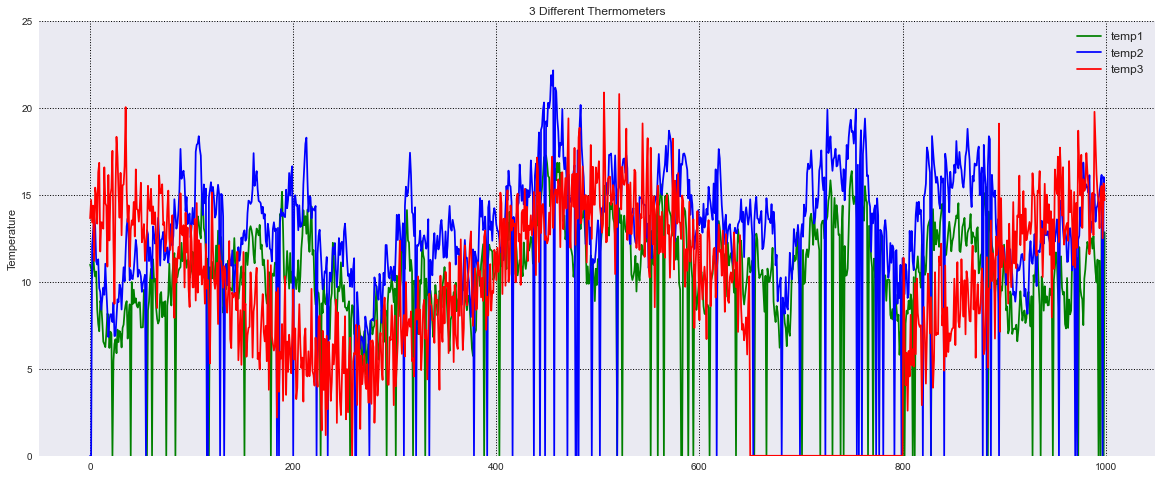

In [35]:
#rcParams['figure.figsize'] = 18,8
figc = plt.figure(figsize =(20,8))
ax1 = plt.subplot(111)

ax1.plot(df1.temp1, label = 'temp1',color = 'green')
ax1.plot(df1.temp2, label = 'temp2',color = 'blue')
ax1.plot(df1.temp3, label = 'temp3',color = 'red')
ax1.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True, color = 'k', linestyle = ':')
plt.title("3 Different Thermometers")
#plt.xlabel("Date Time")
plt.ylabel("Temperature")
plt.ylim(0, 25)
plt.style.use('seaborn-bright')
plt.legend(loc ="best", fontsize ="large")
plt.show()


#### d) Explain in your own words how the data looks like. Don't be too specific, try to "explain" the big picture in 2-3 sentences. HINT: don't focus only on the missing data

The evaluation was with Timedelta ('0 days 00:16:39') 

The three temperatures have a varied oscillation, some have shown temperatures with constant variations, and others have reached high results, as others have shown a high percentage of missing values. 

#### e) Now create one figure with one axis element to visualise the temperature of signal 1 and 2 in one coordinate system. Don't forget to label your x- and y-axis

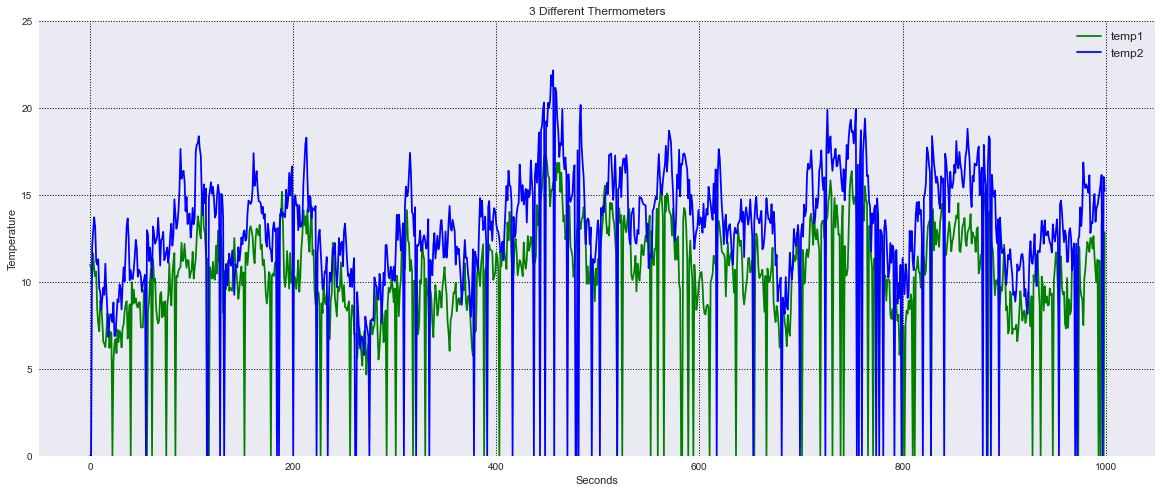

In [36]:
figd = plt.figure(figsize =(20,8))
ax1 = plt.subplot(111)

ax1.plot(df1.temp1, label = 'temp1',color = 'green')
ax1.plot(df1.temp2, label = 'temp2',color = 'blue')
ax1.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(True, color = 'k', linestyle = ':')
plt.title("3 Different Thermometers")
#plt.xlabel("Date Time")
plt.ylabel("Temperature")
plt.xlabel("Seconds")
plt.ylim(0, 25)
plt.style.use('seaborn-bright')
plt.legend(loc ="best", fontsize ="large")
plt.show()

#### f) Describe in 1-2 sentences what you now see 

The thermal changes of the temperature data (temp2) have had a more dramatic change in the middle of the evaluation, almost reaching its peak at nearly 25. 
The temperature data (temp3) thermal changes have been the most noticeable since the thermal changes increase and decrease drastically in every span of seconds. 

#### g) Create another figure to use a scatter plot to visualize temperature signal 1 and 2

In [40]:
#s = df1['temp1', 'temp2'] = np.abs(df1.temp1, df1.temp2 )

(0.0, 25.0)

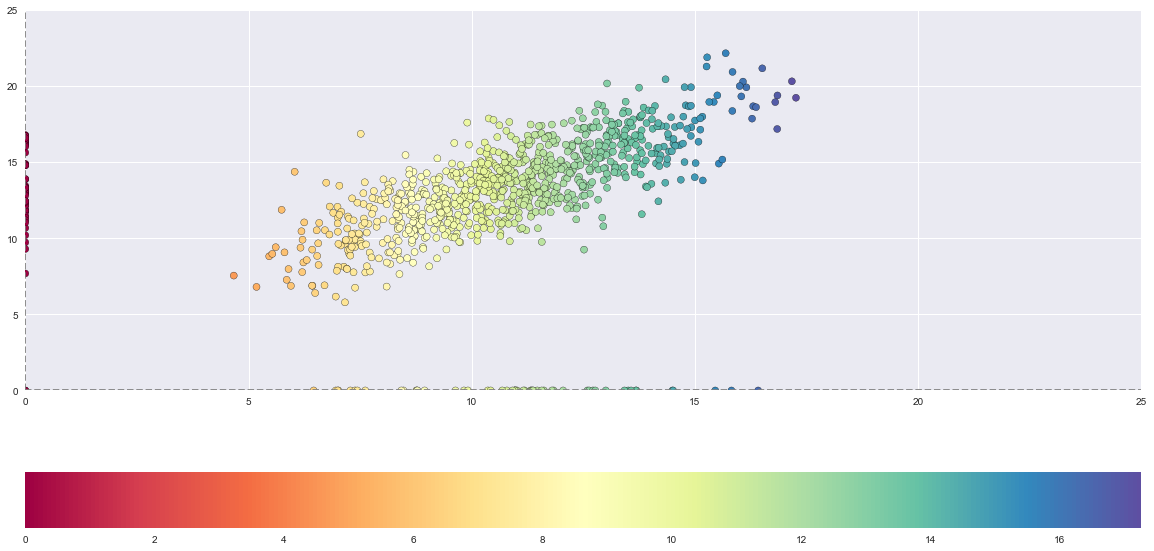

In [38]:
#https://www.youtube.com/watch?v=tmrXuom85TY

rcParams['figure.figsize'] =20,10
plt.axvline(0, c=(.5, .5,.5), ls='--')
plt.axhline(0, c=(.5, .5,.5), ls='--')
plt.style.use('seaborn')
plt.scatter(df1.temp1, df1.temp2, c= df1.temp1, cmap='Spectral', edgecolor = 'k'); #, s = s * 10
plt.colorbar(orientation = 'horizontal');
plt.ylim(0, 25)
plt.xlim(0, 25)

#### h) There seems to be a pattern. Try to describe it in 1-2 sentences

The graph shows us that the temperature increase is constantly increasing in both experiments. The horizontal section at the beginning indicates that the temperature is rising over time.

#### i) What do you see if you plot the temperature of signal 1 against the temperature of signal 3. Use again a scatter plot and try to describe what you see

The graph shows us that the temperature increase is centralized in a homogeneous way in both experiments. The horizontal section at the start indicates the time it takes for it to begin to heat evenly, with little variety of magnification.

(0.0, 25.0)

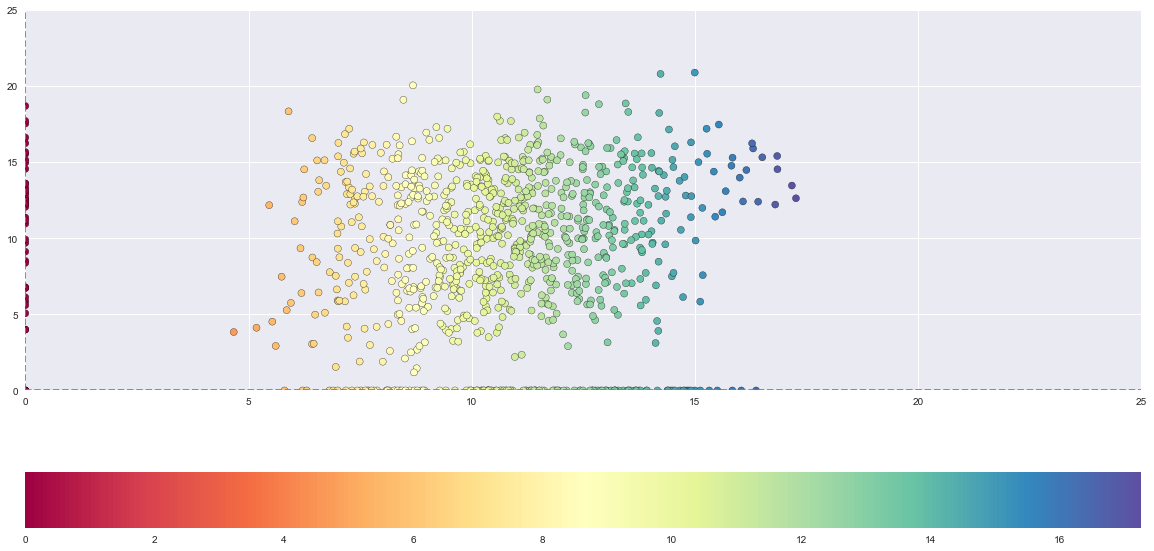

In [39]:
rcParams['figure.figsize'] =20,10
plt.axvline(0, c=(.5, .5,.5), ls='--')
plt.axhline(0, c=(.5, .5,.5), ls='--')
plt.style.use('seaborn')
plt.scatter(df1.temp1, df1.temp3, c= df1.temp1, cmap='Spectral', edgecolor = 'k'); #, s = s * 10
plt.colorbar(orientation = 'horizontal');
plt.ylim(0, 25)
plt.xlim(0, 25)

#### k) Visualize temperature signal 3 in a figure. Can you guess how the data was generated? Hint: have a look at https://mathworld.wolfram.com/Cosine.html 

In [188]:
import datetime
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nsepy import get_history


In [41]:
df2 = df1.copy()

In [43]:
df2['month'] = df2['time'].apply(lambda x: x.month)
df2['day'] = df2['time'].apply(lambda x: x.day)
df2['year'] = df2['time'].apply(lambda x: x.year)
df2['hour'] = df2['time'].apply(lambda x: x.hour)
df2['minute'] = df2['time'].apply(lambda x: x.minute)
df2['second'] = df2['time'].apply(lambda x: x.second)

#### l) To make the guessing easier, you try to visualize the temperature signal 3 and your guess in the same figure
Hints: 
- Use np.cos and/or np.sin and guess the intercept, amplitude and period 
- you must create a numpy.ndarray with exactly the same length as the dataframe of your experimental data  
- be careful when you used the time column for the values on the x-axis. It could be a good idea to create a new pandas.DataFrame with the time column and your guess signal 

In [49]:
import matplotlib.pyplot as plt

figi = np.linspace(0, 2* np.pi,100)
ax1 = np.sin(figi)

ax1.plot(df1.temp1, label = 'temp1',color = 'green')
plt.plot(figi,ax1)
plt.grid(True, color = 'k', linestyle = ':')
plt.title("temp3")

plt.show()

#### l) Next week you'll have a meeting with the laboratory supervisor. You're not happy that your dataset contains some missing values. You think that it could be related sensor malfunction. Because you know that the laboratory supervisor doesn't like plain numbers, you try to come up with a nice visualisation that shows the percentage of missing values for each of the 3 temperature signals. If you need some inspiration have a look at https://matplotlib.org/stable/gallery/index.html

#### m) The laboratory supervisor doesn't like looking at plots in jupyter notebooks. To improve the likelihood that she'll have a look to see if there's something wrong with the temperature sensors you'll plan to create a nice slide deck. For that you need to export your visualisation (figure) as a png/pdf file. Hint: have a look at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html and save your figure as a png or pdf file. Make sure that you specify the path correctly and check if you're able to open the created file. Does the visualisation look good?

#### Bonus question: what would you do about the missing values of temperature signal 3? Are there any reasonable approaches to fill in values for missing timestamps? 